## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# shape returns (rows, columns)
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
# used series.nunique() function
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
# it is same as (total converted)/(total rows)
df.converted.sum()/df.converted.count()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# first find unique vals in landing page
df.landing_page.unique()

array(['old_page', 'new_page'], dtype=object)

In [7]:
# It is same as the (conrol, new_page) + (treatment, old_page)
(df.query("(group == 'control' & landing_page == 'new_page') or (group == 'treatment' & landing_page == 'old_page')")).user_id.count()

3893

f. Do any of the rows have missing values?

In [8]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# get the rows with (control, old_page) and (treatment, new_page)
df2 = df.query("(group == 'control' & landing_page == 'old_page') or (group == 'treatment' & landing_page == 'new_page')")

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
# used series.nunique() function
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# duplicated() returns the True for the first instance of a duplicate
df2[df2.user_id.duplicated()].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.drop_duplicates(['user_id'], inplace=True, keep='first')

#check if duplicate still exists
df2[df2.user_id.duplicated()]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
# used seried.mean() function to get the prob value
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
df2.query('group == "control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
df2.query('group == "treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
(df2.landing_page == "new_page").mean()

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**The control group converts more no. of people on average than the treatment group of people and, the difference is very small. Therefore, we can not conclude that there is sufficient evidence that the new treatment page leads more conversions.**  

**Practical Reasoning**  
Also we need to consider factors such as change aversion, because of a change old users simply did not liked it. We don't know about the distribution of the old and new user so we can not conclude this.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: $p_{new} - p_{old} = 0$$


$$H_1: $p_{new} - p_{old} \neq 0$$


**$$p_{new}$ and $\p_{old}$ are the converted rates for the new and old pages, respectivley.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
n_new = df2.query('group == "treatment"').user_id.count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
n_old = df2.query('group == "control"').user_id.count()
n_old

145274

In [23]:
# p_new - p_old
p_diff_sample = p_new - p_old
p_diff_sample

0.0

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

**Note**: In the below part I have used **np.random.choice** because we are asked to give an array of 0,1 of choices. We can use **np.random.binomial** it will not give array but directly the mean.

In [26]:
# simulating the n_new with p = p_new for 1 time
new_page_converted = np.random.choice([0, 1], p=[p_new, 1-p_new], size=n_new)
new_page_converted

array([1, 0, 1, ..., 0, 1, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
# simulating the n_old with p = p_ols
old_page_converted = np.random.choice([0, 1], p=[p_old, 1-p_old], size=n_old)
old_page_converted

array([1, 1, 1, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
# find the difference b/w the means of new and old page conversion rates
p_diff_sample = (new_page_converted.mean() - old_page_converted.mean())
p_diff_sample

-0.0013883451607964448

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
# simulate the sample distribution for 10000 times

p_diffs = []

for _ in range(10000):
    new_page_converted_ = np.random.choice([0, 1], p=[p_new, 1-p_new], size=n_new)
    old_page_converted_ = np.random.choice([0, 1], p=[p_old, 1-p_old], size=n_old)
    p_diffs.append(new_page_converted_.mean() - old_page_converted_.mean())
p_diffs = np.asarray(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

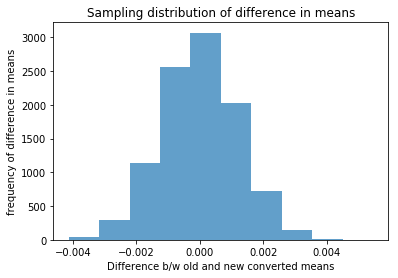

In [28]:
# plot the histogram of the sampling distribution of difference in means of old and new conversion rates

plt.title("Sampling distribution of difference in means")
plt.xlabel('Difference b/w old and new converted means')
plt.ylabel('frequency of difference in means')
plt.hist(p_diffs, alpha=0.7,);
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
# actual difference between the new and old from the data
actual_diff = df2.query("group == 'treatment'").converted.mean() - df2.query("group == 'control'").converted.mean()
actual_diff

-0.0015782389853555567

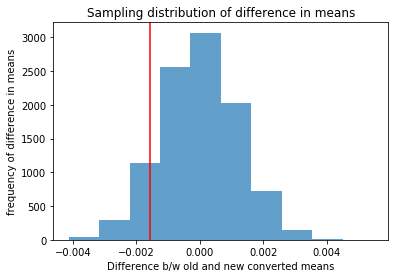

In [30]:
# plot the histogram of the sampling distribution of difference in means of old and new conversion rates
# plot the line with actual mean
plt.title("Sampling distribution of difference in means")
plt.xlabel('Difference b/w old and new converted means')
plt.ylabel('frequency of difference in means')
plt.hist(p_diffs, alpha=0.7,);
plt.axvline(actual_diff ,c='r')
plt.show()

In [31]:
(p_diffs > actual_diff).mean()

0.90300000000000002

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The value we computed in part (j) is called p-value. The p-value is probablity under the null hypothesis. If p-value is greater than the Type-I error threshold then we say "failed to reject the null hypothesis", and if p-value is within the threshold then we Reject the null hypothesis and accept the Alternative hypothesis.  
Here, we got a very large p-value that is 0.90, so we can not reject the null hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
# finding the no. of conversions for control, treatment group and no of users that got old page or new landing page
import statsmodels.api as sm

convert_old = df2.query('group == "control"').converted.sum()
convert_new = df2.query('group == "treatment"').converted.sum()
n_old = df2.query('landing_page == "old_page"').user_id.count()
n_new = df2.query('landing_page == "new_page"').user_id.count()

print(f" convert_old : {convert_old}\n convert_new : {convert_new}\n n_old : {n_old}\n n_new : {n_new}")

 convert_old : 17489
 convert_new : 17264
 n_old : 145274
 n_new : 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [34]:
# importing the statsmodel.stats.proportion to perform Z-test on the sample data
from statsmodels.stats.proportion import proportions_ztest

In [36]:
# Get the Z-score and p-value of the distribution
z_score, p_val = proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

print(z_score, p_val)

1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**In the II-part we got a Z-score of 1.3109 and p-value of 0.905 which is similar to what we got in the Part-I**  
**Z-scores are expressed in terms of standard deviations from their means. Resultantly, these z-scores have a distribution with a mean of 0 and a standard deviation of 1. Reference : https://statistics.laerd.com/statistical-guides/standard-score-2.php.**

**Both the results form j and k signifies that the p-value to be greater than 0.90 which is huge so we can not reject the Null hypothesis and stick with it. So, we can not say that the new treatment page drived more conversion than the old landing page.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since, we want to classify whether a user converted or not we will be performing Logistic regression in this case.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [38]:
# use dummy variable for the group
df2[['control', 'ab_group']] = pd.get_dummies(df2.group)
#check result
df2.head(1)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,control,ab_group
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0


In [40]:
# drop the control coulmn
df2.drop(['control'], axis=1, inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [41]:
# add column for intercept
df2['intercept'] = 1

df2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,user_id,timestamp,group,landing_page,converted,ab_group,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [43]:
model = sm.Logit(df2['converted'], df2[['intercept', 'ab_group']])

results = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [45]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-27 13:28 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_group     -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value associated with the ab_page is 0.1899 which is greater than threshold of 0.05. Our Null hypothesis is that their is no imporvement in the conversion rates with the new treatment page, and our alternative hypothesis is that there is an imporovement in conversion rates.  
Our p-value differs from the Part II where we got the p-value to be 0.90, which is much higher than this because of we made sample distribution from 10000 samples and it is possible that the samples were overlapping and here in Logistic regression it fitted very well.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**There are other things which might infulence whether the individual converts or not. For example, if a user is new or old user. A old user will not like the changes because of novelty aversion whereas a new user will be okay with that. Considering also factors will increase the performance of the logistic regression model. However, if our additions terms are not independent then our model will not show reliable results.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

**The p-values associated with the countries are larger than the threshold value of 0.05 therefore they are not significant factor in determining the conversion rates. And we can not say that the country has an impact on the conversion rates of the landing page**

In [46]:
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [48]:
# join the df2 to df_countries
df_countries = df_countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_countries.head(2)

,country,timestamp,group,landing_page,converted,ab_group,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1


In [49]:
# find unique values
df_countries.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

> We need to make 2 dummy variables for the countries

In [50]:
df_countries[['UK', 'US', 'CA']] = pd.get_dummies(df_countries.country)

df_countries.head(1)

,country,timestamp,group,landing_page,converted,ab_group,intercept,UK,US,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [53]:
model2 = sm.Logit(df_countries['converted'], df_countries[['intercept', 'ab_group', 'UK', 'US']])
results2 = model2.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [54]:
results2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-27 13:55 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_group     -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
UK           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
US            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

> The p-values associated with the countries are larger than the threshold value of 0.05 therefore they are not significant factor in determining the conversion rates.

## Conclusion

- After the A/B testing we can not conclude that there is a enough evidence to reject the Null hypothesis that is ther is no enough evidence that the new treatment page converts better than the old treatment page. So, we should not proceed with going with a new landing page.
- Practical reasoning: We have not considered the type of users i.e new or old. Including this factor in our analysis would provide valuable insights wether new user liked the landing page or not.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

## Resources and References
- https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.binomial.html  
- https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/  
- https://stackoverflow.com/questions/53148935/one-sample-test-for-proportion


In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0